In [ ]:
!gdown --id 1Nma7yAXRUxCpR4zVs070JJlnui_bv3yX

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Nma7yAXRUxCpR4zVs070JJlnui_bv3yX
To: /content/IMDB Dataset.csv
100% 66.2M/66.2M [00:00<00:00, 75.5MB/s]


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip -d glove

--2023-05-10 10:45:10--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-10 10:45:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-10 10:45:11--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

#Task 1

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler


import re

%matplotlib inline

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Dataset Visualization

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
df.info() #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df['review'].duplicated().sum() #checking for duplicates

418

In [ ]:
df.drop_duplicates(subset=['review'],inplace=True) #removing duplicates

In [ ]:
df.info() #no null and duplicate values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

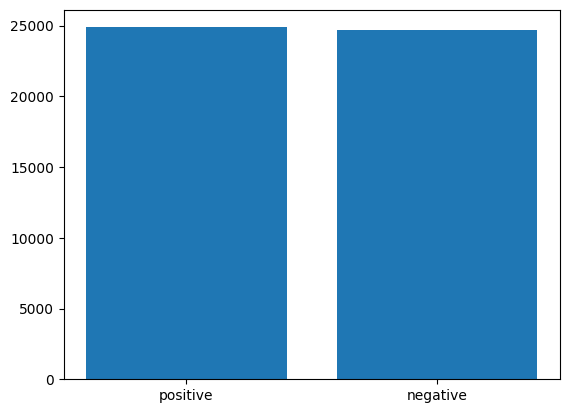

In [ ]:
plt.bar(['positive','negative'],df['sentiment'].value_counts())
plt.show()

#Data Pre-processing

In [ ]:
df['review'] = df['review'].apply(lambda x : x.lower())

In [ ]:
import string
exclude = string.punctuation


def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  text = pattern.sub(r'',text)
  return re.sub(' +',' ',text) # This'll remove multi spaces

def remove_url(text):
  pattern=re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

def remove_stopwords(text):
    new_list = []
    words = text.split()
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)


In [ ]:
df['review']= df['review'].apply(lambda x : remove_html_tags(x))

In [ ]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
df['review']= df['review'].apply(remove_url)

In [ ]:
df['review']= df['review'].apply(remove_punc)

In [ ]:
df['review']= df['review'].apply(remove_stopwords)

In [ ]:
df['review'][0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

#Vectorizing TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()
review_tfidf = vectorizer.fit_transform(df['review'])

In [ ]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review_tfidf, df['sentiment'], test_size=0.2, random_state=42)

#Training Models

#1) Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial')
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr_ac=accuracy_score(y_test,LR_pred)
lr_f1=metrics.f1_score(y_test,LR_pred, average="weighted")


In [ ]:
lr_ac

0.8960371079963698

#2) Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB= MultinomialNB(force_alpha=True)
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)

In [ ]:
nb_ac=accuracy_score(y_test,NB_pred)
nb_f1=metrics.f1_score(y_test,NB_pred, average="weighted")

In [ ]:
nb_ac

0.8667943934657658

#Accuracy Score Comparison

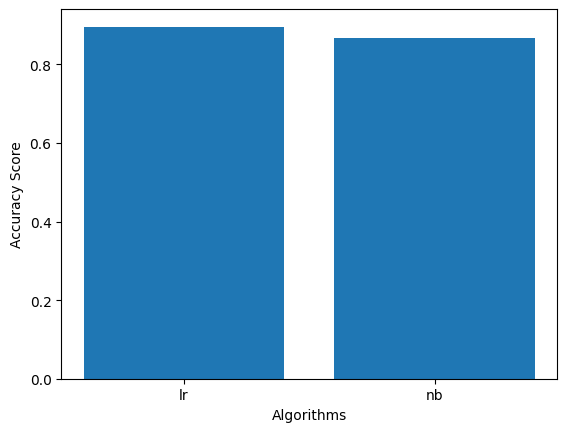

In [ ]:
plt.bar(x=['lr', "nb"],height=[lr_ac, nb_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

#F1 Score Comparison

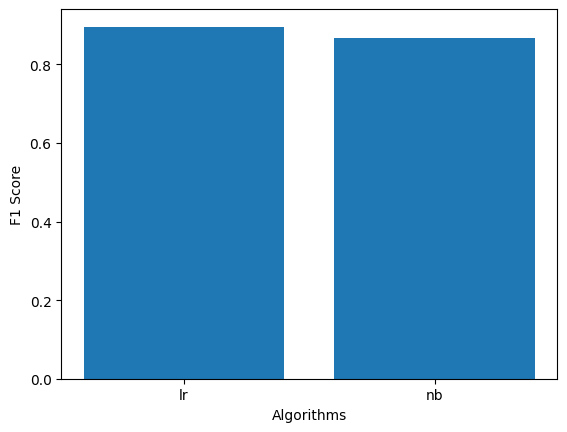

In [ ]:
plt.bar(x=['lr', "nb"],height=[lr_f1, nb_f1])
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.show()

#Confusion Matrix

In [ ]:
# confusion_matrix = metrics.confusion_matrix(y_test, LR_pred)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3])

# cm_display.plot()
# plt.title("Logistic Regression")
# plt.show()

In [ ]:
# confusion_matrix = metrics.confusion_matrix(y_test, NB_pred)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3])

# cm_display.plot()
# plt.title("Naive Bayes")
# plt.show()


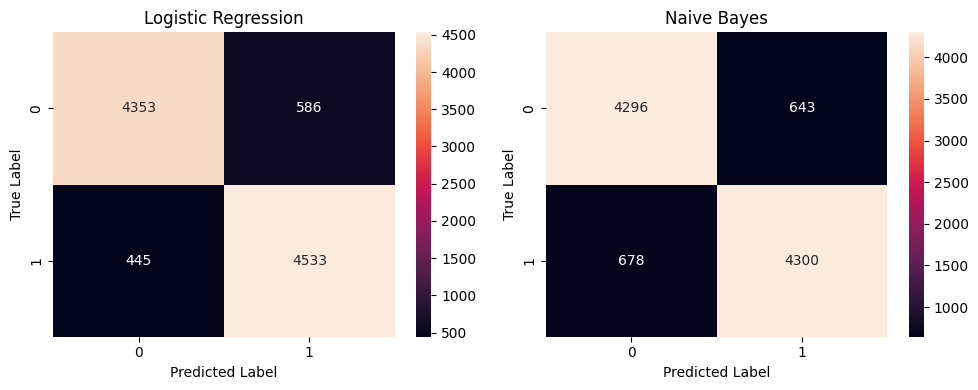

In [ ]:
cm_lr = metrics.confusion_matrix(y_test, LR_pred)
cm_nb = metrics.confusion_matrix(y_test, NB_pred)


fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
sns.heatmap(cm_nb, annot=True, fmt='d', ax=axes[1])
axes[1].set_title('Naive Bayes')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
plt.tight_layout()
plt.show()

#Conlusion

Considering all the metrics, Logistic Regression is better for the given dataset



#Task 2

In [ ]:
tokenized_reviews = df['review'].apply(word_tokenize)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_reviews)

In [ ]:
sequences = tokenizer.texts_to_sequences(tokenized_reviews)
maxlen = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences,maxlen=maxlen)

In [ ]:
embedding_file = '/content/glove/glove.6B.100d.txt'


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

In [ ]:
embeddings = {}
with open(embedding_file, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings[word] = coefs

In [ ]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=np.max(padded_sequences) + 1, output_dim=100, input_length=padded_sequences.shape[1]))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='relu'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test),validation_split=0.1)

Epoch 1/50
2480/2480 [==============================] - 3809s 2s/step - loss: 0.5349 - accuracy: 0.7627 - val_loss: 0.3891 - val_accuracy: 0.8602
Epoch 2/50
1023/2480 [===========>..................] - ETA: 35:44 - loss: 0.3688 - accuracy: 0.8771

KeyboardInterrupt: ignored